출처 : https://gils-lab.tistory.com/119

# [데이터 코딩테스트 대비 #2] 교통사고 통계

## 문제 
accident_stat.xlsx는 교통사고 유형별 교통사고 사고건수, 사망자수, 중상자수 등을 요약한 데이터이다. 이 데이터를 활용하여 아래에 답하시오.

### 1. 사고유형대분류가 '차대차'인 사고유형별 사망비율을 막대그래프로 시각화하시오. 단, 사망비율은 사망자수/사고건수로 계산하며, matplotlib에서 폰트는 아래 코드를 이용하여 맑은 고딕으로 설정합니다.

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic') 		
plt.rcParams['axes.unicode_minus'] = False

In [17]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# load data
data = pd.read_excel('./data/accident_stat.xlsx')

In [4]:
data

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사고유형대분류  17 non-null     object
 1   사고유형중분류  17 non-null     object
 2   사고유형     17 non-null     object
 3   사고건수     17 non-null     int64 
 4   사망자수     17 non-null     int64 
 5   중상자수     17 non-null     int64 
 6   경상자수     17 non-null     int64 
 7   부상신고자수   17 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.2+ KB


In [5]:
vhc2vhc = data[data['사고유형대분류']=='차대차']
vhc2vhc

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


In [15]:
vhc2vhc['사망비율'] = vhc2vhc['사망자수'] / vhc2vhc['사고건수']

/var/folders/hp/rx9_xs2s0z9f7xz1yr3rjcn40000gn/T/ipykernel_20754/45143240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vhc2vhc['사망비율'] = vhc2vhc['사망자수'] / vhc2vhc['사고건수']


In [16]:
vhc2vhc

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,사망비율
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588,0.025976
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781,0.005636
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162,0.000569
8,차대차,추돌,추돌,32717,379,7564,47111,2748,0.011584
9,차대차,기타,기타,44222,248,9990,49616,3839,0.005608


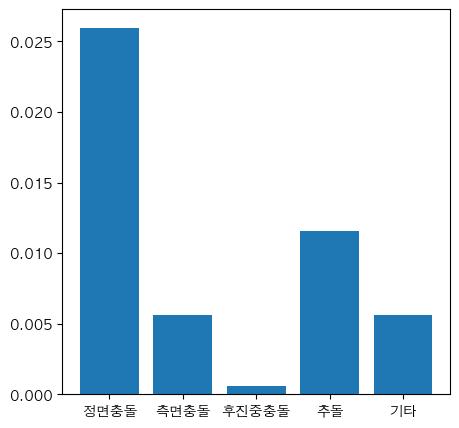

In [25]:
# 막대 그래프 시각화 
fig = plt.figure(figsize=(5,5))
ax = plt.bar(x=vhc2vhc['사고유형'], height=vhc2vhc['사망비율'], )

### 2. 사고유형대분류별로 사망자수가 가장 많은 사고 유형을 출력하세요. 그 결과는 ['횡단중','측면충돌','공작물충돌'] 이어야 합니다.

In [26]:
data

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


In [40]:
data2 = data.groupby('사고유형대분류')['사망자수'].idxmax()

In [41]:
data2

사고유형대분류
차대사람     0
차대차      6
차량단독    12
Name: 사망자수, dtype: int64

In [42]:
result = data.iloc[data2]

In [46]:
result[['사고유형대분류', '사고유형', '사망자수']]

,사고유형대분류,사고유형,사망자수
0,차대사람,횡단중,445
6,차대차,측면충돌,404
12,차량단독,공작물충돌,340


### 3. 사고유형별 중상비율을 계산하고 중상비율이 50%를 넘는 데이터만 증상비율.csv로 저장합니다. 
이 csv파일은 ./data/증상비율.csv와 같은 구조를 갖습니다.

In [47]:
data

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


In [48]:
data3 = data.copy()
data3['중상비율'] = data3['중상자수'] / data3['사고건수']
data3

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,중상비율
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458,0.469883
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183,0.396362
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121,0.285352
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131,0.334681
4,차대사람,기타,기타,14675,333,4887,9139,1062,0.333015
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588,0.448429
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781,0.247688
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162,0.086511
8,차대차,추돌,추돌,32717,379,7564,47111,2748,0.231195
9,차대차,기타,기타,44222,248,9990,49616,3839,0.225906


In [49]:
result3 = data3[data3['중상비율'] >= 0.5]
result3

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,중상비율
11,차량단독,전복,전복,165,36,87,81,27,0.527273
14,차량단독,도로이탈,도로이탈 추락,385,73,199,179,44,0.516883


In [59]:
sample = pd.read_csv("./data/accident_stat/중상비율.csv", encoding='utf-8-sig')

In [60]:
sample

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,중상비율
0,차량단독,전복,전복,165,36,87,81,27,0.527273
1,차량단독,도로이탈,도로이탈 추락,385,73,199,179,44,0.516883


In [58]:
result3.to_csv('./data/accident_stat/중상비율.csv', index=False, encoding='utf-8-sig')